In [8]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# use iris and get only petal width and sepal length
iris = load_iris()
sepal_length = iris.data[:, 0]
petal_width = iris.data[:, 3]
target = iris.target

species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
species_name = [species_dict[i] for i in target]

In [3]:
# create a regression line with y = b + sepal_length * x, where b = 0 and m = 1
b = 0
x = 0

# create a list of y values using list comprehension
y = [
    b + sepal_length[i] * x for i in range(len(sepal_length))
]

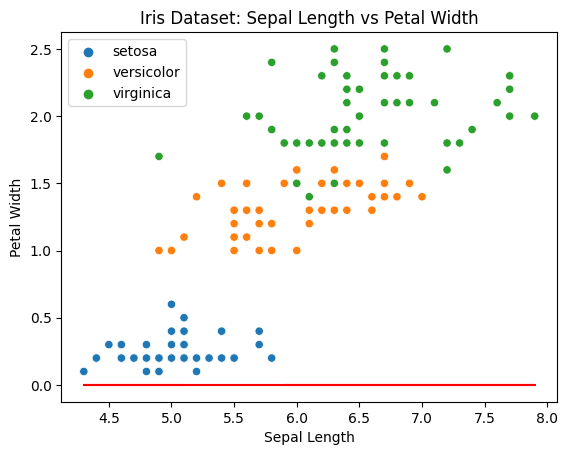

In [6]:
sns.scatterplot(x = sepal_length, y = petal_width, hue=species_name)
plt.plot(sepal_length, y, c='r')
plt.title('Iris Dataset: Sepal Length vs Petal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [12]:
def predict(b, x, data):
    return [b + data[i] * x for i in range(len(data))]

def gradient_descent(x, y, epochs, alpha = 0.01):
    intercept, coefficient = 0, 0

    for _ in range(1, epochs):
        predictions = predict(intercept, coefficient, x)
        intercept = intercept - alpha * np.sum(predictions - y) / len(x)
        coefficient = coefficient - alpha * np.sum((predictions - y) * x) / len(x)

    return intercept, coefficient

b, x = gradient_descent(sepal_length, petal_width, 10000)
print(b, x)

-2.717366489030271 0.6718570469763597


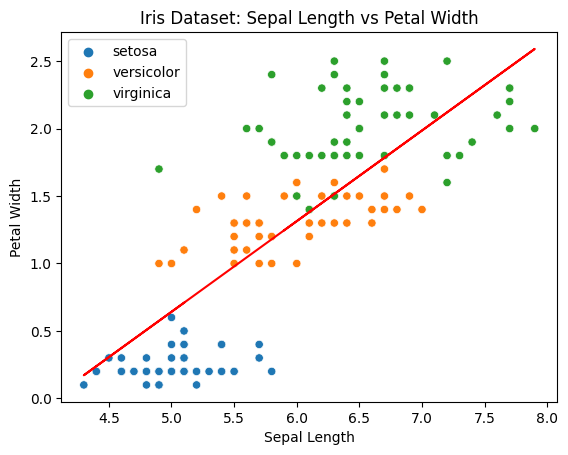

In [13]:
corrected_regression_line = [b + sepal_length[i] * x for i in range(len(sepal_length))]
sns.scatterplot(x = sepal_length, y = petal_width, hue=species_name)
plt.plot(sepal_length, corrected_regression_line, c='r')
plt.title('Iris Dataset: Sepal Length vs Petal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()